# Multivariate Linear Regression

### 1.1. Importing libraries

In [45]:
import numpy as np
import math
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 6)

### 1.2. Generate dataset following the equation 
$y = X_0 + 10\sin(X_1) + 15\sin(X_2) + \eta \;\sigma{(0,1)}$

In [50]:
# Mean and Std for Gaussian Noise
mean = 0
sigma = 1
# Constant 
eta = 0.5
# Generate Dataset 
X_0 = np.ones(500)
X_1 = np.linspace(8, 50, num=500)
X_2 = np.linspace(10, 400, num=500)
Y = 10 * np.sin(X_1) + 15 * np.sin(X_2) + (eta * np.random.normal(mean, sigma, X_1.shape))
X = np.vstack((np.sin(X_0), np.sin(X_1), np.sin(X_2))).T
X.shape

(500, 3)

### 1.3. Parameters estimation using the Matrix formulation(Inversion Update Rule)
Given dataset $X$ of order $m \times n$, where $m$ is the number of training examples and $n$ are the number of features, and $Y$ of order $1 \times m$. <br>
For some $Y = X\theta$, we estimate $\theta$ by the following rule:

$
\begin{align}
    \theta = [X^TX]^{-1}X^T \cdot Y
\end{align}
$

In [52]:
# Estimated Theta
theta = np.dot( np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y) )

print("Estimated Parameters using Inversion Update Rule: ")
for t in range(len(theta)):    
    print("theta_{} = {}".format(t, theta[t]))
# Predict Y with new params 
Y_pred = X.dot(theta)

Estimated Parameters using Inversion Update Rule: 
theta_0 = -0.010244989060628346
theta_1 = 10.008530905597308
theta_2 = 14.977384775540724


## 2. Parameters estimation using Stochastic GD optimizer

### 2.1. Initializing parameters 

In [82]:
# Learning rate 
lr = 0.01
# Initial weight matrix theta 
theta = [0, 0, 0]
# Current cost
cost = 0
# List of cost in each iteration
costs = []
# number of sample 
n = len(X_0)
# Limit iteration if no convergence 
iterations = 100
# Number of iteration taken if convergence 
nb_iter = 0

### 2.2. Estimate $\mathbf{\theta}$ with SGD optimizer 

In [83]:
for k in range(iterations):
    for i in range(len(X_1)):
        Y_predict = theta[0] + theta[1] * np.sin(X_1) + theta[2] * np.sin(X_2)
        theta[0] = theta[0] - lr * (Y_predict[i] - Y[i])
        theta[1] = theta[1] - lr * (Y_predict[i] - Y[i]) * np.sin(X_1[i])
        theta[2] = theta[2] - lr * (Y_predict[i] - Y[i]) * np.sin(X_2[i])
        
        # Using MSE(Mean Squared Error) as Loss function
        update_cost = (1/n) * np.sum((Y_predict - Y)**2)
        costs.append(update_cost)
        nb_iter += 1
        
        # Stopping criteria: small convergence between loss with order of 1e-05 
        if math.isclose(update_cost, cost, rel_tol=1e-05):
            break
        else:
            cost = update_cost

print("Estimated Parameters using Stochastic Gradient Descent")
for t in range(len(theta)):    
    print("theta_{} = {}".format(t,theta[t]))

print("Number of iteration until convergence = {}".format(iterations))

Estimated Parameters using Stochastic Gradient Descent
theta_0 = -0.04647861101756797
theta_1 = 9.93667292824756
theta_2 = 14.899916440957417
Number of iteration until convergence = 100


### 2.3. Plotting the cost 

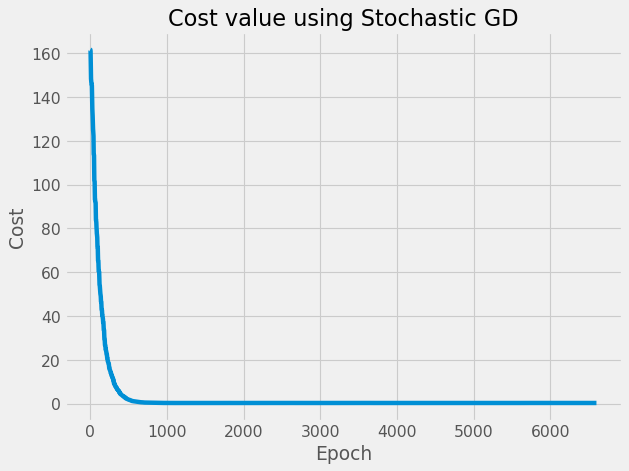

In [84]:
plt.figure(dpi=80)
plt.plot(np.array([i for i in range(nb_iter)]), np.array(costs))
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost value using Stochastic GD")
plt.show()

## 3. Parameters estimation based on Full-batch GD

### 3.1. Initializing parameters 

In [85]:
# Initialize theta vector 
theta = [0, 0, 0]
# Given iteration 
iteration = 10000
# Learning rate 
lr = 0.001
# number of sample 
n = len(X_1)
costs = np.ones(iteration)

### 3.2. Estimate $\mathbf{\theta}$ with FullBatch GD optimizer 

In [86]:
for i in range(iteration):
    Y_predict = theta[0] + theta[1] * np.sin(X_1) + theta[2] * np.sin(X_2)
    
    theta[0] = theta[0] - lr * (1/n) * np.sum(Y_predict - Y)
    theta[1] = theta[1] - lr * (1/n) * np.sum((Y_predict - Y) * np.sin(X_1))
    theta[2] = theta[2] - lr * (1/n) * np.sum((Y_predict - Y) * np.sin(X_2))

	# Compute the cost w.r.t full batch
    costs[i] = (1/n) * np.sum((Y_predict - Y)**2)

print("Estimated Parameters using Full-batch Gradient Descent: ")
for t in range(len(theta)):    
    print("theta_{} = {}".format(t,theta[t]))


Estimated Parameters using Full-batch Gradient Descent: 
theta_0 = -0.012607931788706521
theta_1 = 9.938278883314839
theta_2 = 14.874522129478347


### 3.3. Plotting the cost

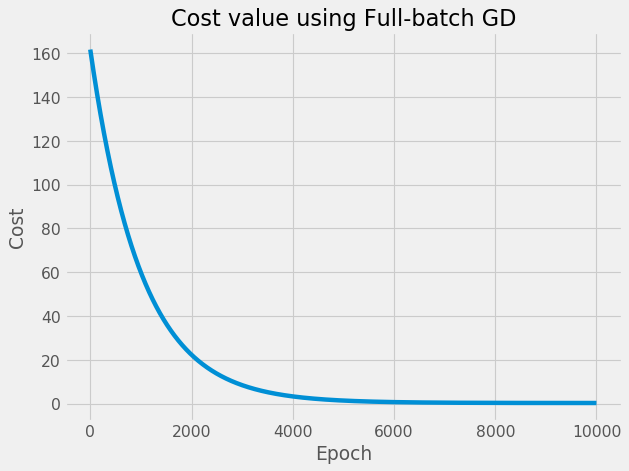

In [87]:
plt.figure(dpi=80)
plt.plot(np.array([i for i in range(iteration)]), np.array(costs))
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost value using Full-batch GD")
plt.show()